In [75]:
import sqlite3
import pandas as pd

db = sqlite3.connect('../battelle.db')
DW = pd.read_sql_query("SELECT doc_id,word_id,word_str,word_count FROM docword",db)
D = pd.read_sql_query('SELECT doc_id,doc_label FROM doc',db)
X = pd.merge(D,DW,on='doc_id')

In [76]:
WordsByYear = X[['word_str','doc_label','word_count']].groupby(['doc_label','word_str']).sum()
WordTotals = X[['doc_label','word_count']].groupby(['doc_label']).sum()

In [87]:
WordsByYear['adj_word_count'] = 0
#WordsByYear['word_count']
WordsByYear.loc['2005']['word_count']

word_str
#                11
%               598
&                91
'                90
''              144
'Chinese          1
'S                1
's              111
*                 2
+                50
+/-              32
+1                2
+or-              4
-                44
-/-               2
-0.2              1
-1               31
-10               3
-12               3
-2                3
-2-               1
-3                2
-30               1
-4                8
-5                3
-5-               1
-6                5
-7                3
-8                2
-85               1
               ... 
yeasts            1
yellow            7
yet              21
yield            56
yielded          11
yielding          4
yields           16
yolk              1
young             5
yr                1
zebrafish         5
zero              2
zinc              8
zipper            1
zone              9
zones             5
zwitterionic      6
zygotes           8
zygotic    

In [92]:
for year in WordTotals.index:
    #this_year = WordsByYear.loc[year]['word_count'][0]
    #total = WordTotals.loc[year][0]
    #adj = (this_year / total) * 100
    #print('year',year,'total',total,'this_year',this_year,'adj',adj)
    #WordsByYear['adj_word_count'] = adj
    WordsByYear.loc[year]['adj_word_count'] = WordsByYear.loc[year]['word_count'] / WordTotals.loc[year][0]
WordsByYear1 = WordsByYear.unstack('doc_label').fillna(0)
WBY1 = WordsByYear1['adj_word_count'].T
WBY1

/Users/rca2t/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


word_str,!,#,$,%,&,','','Candidatus,'Chinese,'S,...,©2012,©2014,©2015,°,±,²,³,³2,¹-¹,á
doc_label,,,,,,,,,,,,,,,,,,,,,
2005,0.000000,0.000071,0.000000,0.003878,0.000590,0.000584,0.000934,0.000000e+00,0.000006,6.484622e-06,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000110,0.000000,0.000000,0.000000,6.484622e-06,0.000052
2006,0.000000,0.000023,0.000009,0.003780,0.000367,0.000519,0.000790,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000087,0.000000,0.000000,0.000000,4.593519e-06,0.000005
2007,0.000004,0.000000,0.000000,0.003990,0.000297,0.000527,0.000908,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000088,0.000000,0.000000,0.000004,0.000000e+00,0.000000
2008,0.000000,0.000059,0.000000,0.003407,0.000381,0.000592,0.000630,0.000000e+00,0.000003,2.680462e-06,...,0.000000,0.000000,0.000000e+00,8.041386e-06,0.000064,0.000003,0.000003,0.000000,0.000000e+00,0.000003
2009,0.000003,0.000005,0.000002,0.003806,0.000428,0.000508,0.000594,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,3.423983e-06,0.000055,0.000000,0.000000,0.000000,0.000000e+00,0.000003
2010,0.000010,0.000027,0.000003,0.004298,0.000383,0.000674,0.000545,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,2.854965e-06,0.000091,0.000004,0.000000,0.000000,1.427482e-06,0.000006
2011,0.000012,0.000030,0.000005,0.004913,0.000308,0.000689,0.000656,1.202333e-06,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000e+00,1.202333e-06,0.000044,0.000001,0.000002,0.000000,2.404667e-06,0.000000
2012,0.000013,0.000011,0.000002,0.004112,0.000277,0.000589,0.000483,1.142966e-06,0.000005,0.000000e+00,...,0.000014,0.000000,0.000000e+00,0.000000e+00,0.000049,0.000000,0.000000,0.000000,1.142966e-06,0.000005
2013,0.000011,0.000018,0.000014,0.004031,0.000327,0.000591,0.000596,1.859279e-06,0.000000,1.859279e-06,...,0.000000,0.000000,0.000000e+00,9.296393e-07,0.000061,0.000003,0.000004,0.000000,1.859279e-06,0.000003


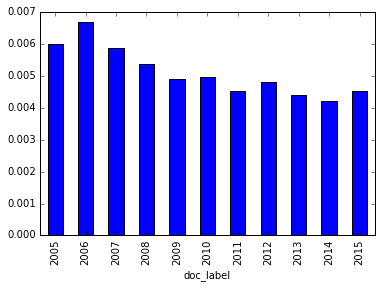

In [95]:
%matplotlib inline
WBY1.loc[:]['biosensor'].plot(kind='bar')

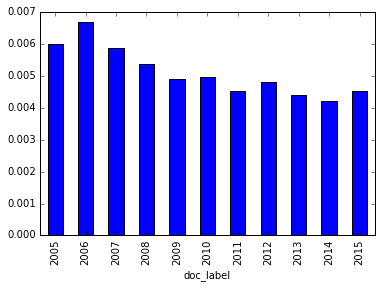

In [96]:
WBY1.loc[:]['protein'].plot(kind='bar')

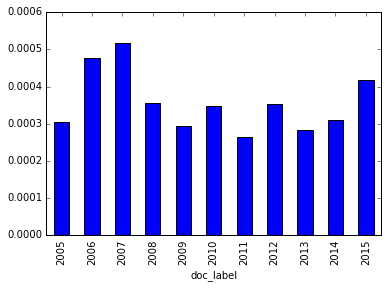

In [97]:
WBY1.loc[:]['proteome'].plot(kind='bar')

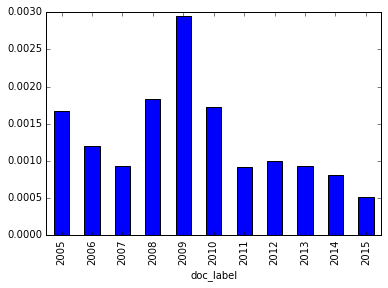

In [98]:
WBY1.loc[:]['algorithm'].plot(kind='bar')